In [1]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, csv, matplotlib.pyplot as plt, pandas as pd
import torch.nn as nn, timeit, torch, pystan as ps, scipy, seaborn as sns
from sklearn.cluster import SpectralClustering
from tqdm import trange
%matplotlib inline
from pylab import plot, show, legend

In [2]:
latent_samples_sorted = np.load('/xtmp/BNN_dim_red_data/user_knowledge_latent_samples_sorted.npy')
N, n_samples = np.shape(latent_samples_sorted)[0:2]

In [3]:
pw_same = [[]]*n_samples
for k in trange(n_samples) :
    clustering = SpectralClustering(n_clusters=4,assign_labels="discretize",
                                    random_state=0).fit(latent_samples_sorted[:,k])
    pw = np.zeros((N,N))
    for i in range(N) :
        pw[i] = (clustering.labels_[i] == clustering.labels_)/n_samples
    pw_same[k] = scipy.sparse.lil_matrix(pw)

100%|██████████| 5000/5000 [03:18<00:00, 25.22it/s]


In [4]:
pw_prob = np.zeros((N,N))
for k in trange(n_samples) :
    pw_prob = pw_prob + pw_same[k]
    
error = np.zeros(n_samples)
for k in trange(n_samples) :
    error[k] = np.linalg.norm(pw_prob-pw_same[k])

100%|██████████| 5000/5000 [00:38<00:00, 130.98it/s]


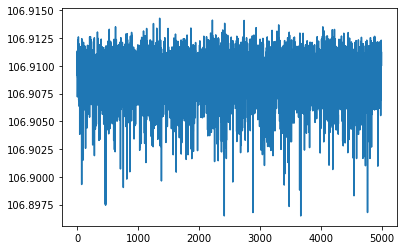

In [5]:
plt.plot(error)

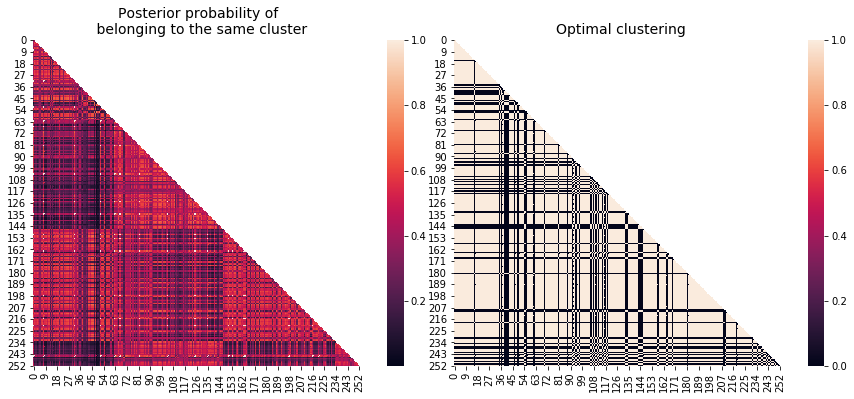

In [19]:
c_idx = np.argmin(error)
cluster_optim = pw_same[c_idx].todense()*n_samples
mask = np.zeros_like(pw_prob)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
ax = sns.heatmap(pw_prob, mask=mask, square=True)
plt.title("Posterior probability of \n belonging to the same cluster", fontsize=14)
plt.subplot(122)
ax = sns.heatmap(cluster_optim, mask=mask, square=True)
plt.title("Optimal clustering", fontsize=14)
plt.subplots_adjust(wspace=1e-2)
plt.savefig('/xtmp/BNN_dim_red_data/user_knowledge_clustering.jpeg', dpi=1000, box_inches='tight')